In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import sys
sys.path.append("/home/javi/Documents/brainhack-physio-project/code")
from input import getData, getInfoData, interpMissingData, getLines, load_cmrr_info, load_cmrr_physio
from events import compute_max_events
from clean import butter_bandpass_filter
from scipy.signal import welch

In [3]:
def interpolate_data(dat):
    new_ticks = dat[:,0]
    n_ch = dat.shape[1]-1
    new_signal = np.zeros((len(new_ticks), n_ch))
    for ii in range(1,n_ch+1):
        signal = dat[:, ii]
        old_ticks = dat[:,0][signal!=0.]
        signal_old = signal[signal!=0.]
        new_signal[:,ii-1] = interp1d(old_ticks, signal_old,
                                      kind="linear", fill_value="extrapolate")(new_ticks)
        
    return new_signal   

In [18]:
resp

array([[0.00000e+00, 7.01000e+02],
       [1.00000e+00, 0.00000e+00],
       [2.00000e+00, 0.00000e+00],
       ...,
       [2.24118e+05, 0.00000e+00],
       [2.24119e+05, 0.00000e+00],
       [2.24120e+05, 0.00000e+00]])

In [16]:
(info[-1, 3] - info[0, 2])/n_vols

299.970189701897

In [5]:
%timeit 100

6.99 ns ± 0.0704 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [7]:
%timeit 100
getInfoData('../data/sample1/Physio_sample1_Info.log', range(4))

6.76 ns ± 0.13 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


(array([[0.0000000e+00, 0.0000000e+00, 2.1892140e+07, 2.1892162e+07],
        [0.0000000e+00, 8.0000000e+00, 2.1892140e+07, 2.1892162e+07],
        [0.0000000e+00, 1.6000000e+01, 2.1892140e+07, 2.1892162e+07],
        ...,
        [7.3700000e+02, 1.3000000e+01, 2.2113495e+07, 2.2113518e+07],
        [7.3700000e+02, 2.1000000e+01, 2.2113495e+07, 2.2113518e+07],
        [7.3700000e+02, 2.9000000e+01, 2.2113495e+07, 2.2113518e+07]]),
 21889410,
 22113530,
 738,
 32,
 300)

In [3]:
info_dict

{'uuid': '6ec4c7ab-b798-4eec-989c-9458617d425c',
 'log_version': 'EJA_1',
 'n_slices': 32,
 'n_vols': 738,
 'num_echoes': 1,
 'first_time': 21889410,
 'last_time': 22113530}

In [2]:
scan_ticks, info_dict = load_cmrr_info('../data/sample1/Physio_sample1_Info.log')

In [14]:
%timeit 100
foo,foo_2, foo_3=load_cmrr_physio("../data/sample1/Physio_sample1_ECG.log", scan_ticks=scan_ticks, info_dict=info_dict)

6.6 ns ± 0.0581 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [6]:
info_dict

{'uuid': '6ec4c7ab-b798-4eec-989c-9458617d425c',
 'log_version': 'EJA_1',
 'n_slices': 32,
 'n_vols': 738,
 'num_echoes': 1,
 'first_time': 21889410,
 'last_time': 22113530}

In [7]:
221379/400/738

0.7499288617886178

In [3]:
load_cmrr_physio("../data/sample1/Physio_sample1_ECG.log", 
                 scan_ticks=scan_ticks, info_dict=info_dict, interpolate=True)

(array([[1306., 1792., 2474., 2469.],
        [1452., 1859., 2309., 2335.],
        [1593., 1877., 2206., 2250.],
        ...,
        [2097., 2049., 2048., 2067.],
        [2098., 2051., 2047., 2067.],
        [2099., 2051., 2047., 2068.]]),
 array([  2730,   2731,   2732, ..., 224106, 224107, 224108]),
 {'uuid': '6ec4c7ab-b798-4eec-989c-9458617d425c',
  'scan_date': '20190813_151159',
  'log_version': 'EJA_1',
  'log_data_type': 'ECG',
  'sample_time': '1'})

In [13]:
%timeit 100
ecg,_,_ =  getData("../data/sample1/Physio_sample1_ECG.log", initial_time, final_time)

6.82 ns ± 0.25 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [2]:
%%time
info,initial_time,final_time,n_vols,n_slices,rep_time = getInfoData('../data/sample1/Physio_sample1_Info.log', range(4))
ecg,_,_ =  getData("../data/sample1/Physio_sample1_ECG.log", initial_time, final_time)
interpMissingData(ecg)
resp, _,_= getData("../data/sample1/Physio_sample1_RESP.log", initial_time, final_time)
interpMissingData(resp)
puls, _,_= getData("../data/sample1/Physio_sample1_PULS.log", initial_time, final_time)
interpMissingData(puls)

CPU times: user 3.07 s, sys: 32.5 ms, total: 3.1 s
Wall time: 3.11 s


array([[0.00000000e+00, 1.80000000e+03],
       [1.00000000e+00, 1.80199808e+03],
       [2.00000000e+00, 1.80200000e+03],
       ...,
       [2.24118000e+05, 2.23300000e+03],
       [2.24119000e+05, 2.23200000e+03],
       [2.24120000e+05, 2.23100000e+03]])

In [6]:
info,initial_time,final_time,n_vols,n_slices,rep_time = getInfoData('../data/sample1/Physio_sample1_Info.log', range(4))


In [2]:
%%time
info,initial_time,final_time,n_vols,n_slices,rep_time = getInfoData('../data/sample1/Physio_sample1_Info.log', range(4))
ecg,_,_ =  getData("../data/sample1/Physio_sample1_ECG.log", initial_time, final_time)
interpolate_data(ecg)
resp, _,_= getData("../data/sample1/Physio_sample1_RESP.log", initial_time, final_time)
interpolate_data(resp)
puls, _,_= getData("../data/sample1/Physio_sample1_PULS.log", initial_time, final_time)
interpolate_data(puls)

NameError: name 'interpolate_data' is not defined

In [121]:
interpolate_data(ecg).shape

(224121, 4)

In [113]:
n_ticks = puls[:,0]
old_ticks = puls[:,0][puls[:,1]!=0.]
singal_old = puls[:,1][puls[:,1]!=0.]
interp1d(old_ticks, singal_old, kind="linear", fill_value="extrapolate")(n_ticks)

array([1800., 1801., 1802., ..., 2233., 2232., 2231.])

In [102]:
%%time
info,initial_time,final_time,n_vols,n_slices,rep_time = getInfoData('../data/sample1/Physio_sample1_Info.log', range(4))
ecg,_,_ = getData("../data/sample1/Physio_sample1_ECG.log", initial_time, final_time)
resp,_,_= getData("../data/sample1/Physio_sample1_RESP.log", initial_time, final_time)

interpMissingData(resp)

CPU times: user 2.61 s, sys: 66.2 ms, total: 2.68 s
Wall time: 2.67 s


array([[0.00000000e+00, 7.01000000e+02],
       [1.00000000e+00, 7.34991098e+02],
       [2.00000000e+00, 7.34992370e+02],
       ...,
       [2.24118000e+05, 1.00687500e+03],
       [2.24119000e+05, 1.00500000e+03],
       [2.24120000e+05, 1.00312500e+03]])

CPU times: user 27.5 ms, sys: 3.45 ms, total: 30.9 ms
Wall time: 27.8 ms


In [57]:
from scipy.interpolate import interp1d

In [79]:
interp1d?

In [97]:
np.linspace(singal_old[0], singal_old[1], 8)

array([701.        , 705.85714286, 710.71428571, 715.57142857,
       720.42857143, 725.28571429, 730.14285714, 735.        ])

In [89]:
signal_new[:20]

array([701.   , 705.25 , 709.5  , 713.75 , 718.   , 722.25 , 726.5  ,
       730.75 , 735.   , 743.875, 752.75 , 761.625, 770.5  , 779.375,
       788.25 , 797.125, 806.   , 814.5  , 823.   , 831.5  ])

In [99]:
%%time
interpMissingData(resp)

CPU times: user 759 ms, sys: 0 ns, total: 759 ms
Wall time: 756 ms


array([[0.00000000e+00, 7.01000000e+02],
       [1.00000000e+00, 7.34991098e+02],
       [2.00000000e+00, 7.34992370e+02],
       ...,
       [2.24118000e+05, 1.00687500e+03],
       [2.24119000e+05, 1.00500000e+03],
       [2.24120000e+05, 1.00312500e+03]])

In [24]:
getData("../data/sample1/Physio_sample1_ECG.log", initial_time, final_time)[0][-1]

array([224120.,   1970.,   2064.,   2066.,   2046.])

In [3]:
ecg_rate = 400.
time_physio = ecg[:,0]/ecg_rate # In sec
ecg_signal = ecg[:,1:]
scan_rate = 1/2
time_scan = np.arange(280)/scan_rate

In [4]:
low_cut = 0.1
high_cut = 15.0
delta = 200
peak_rise = 0.95

In [5]:
ix_1 = 0
ix_2 = 3
ground_ecg = ecg_signal[:,ix_1]

signal = ground_ecg - ecg_signal[:,ix_2] 

signal = signal - np.mean(signal)
signal_filt = butter_bandpass_filter(signal,lowcut=low_cut, highcut=high_cut, fs=ecg_rate)

(10000.0, 15000.0)

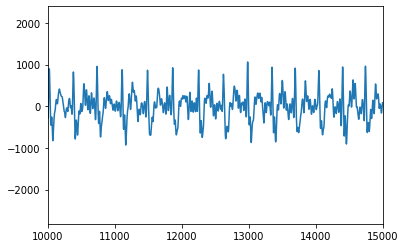

In [6]:
plt.plot(signal_filt)
plt.xlim([10000,15000])

In [1]:
import sys
sys.path.append("../code")

In [2]:
from regressors import RetroicorPhysio, RVPhysio, HVPhysio

(0.0, 25.0)

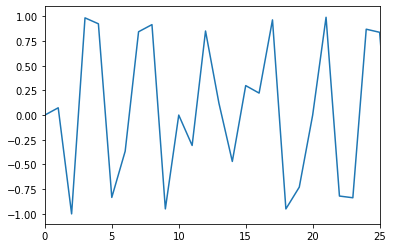

In [19]:
from scipy.signal import resample
plt.plot(np.sin(resample(np.arange(100)*2*np.pi, 1000)))
plt.xlim([0,25])

In [11]:
retroicor.compute_regressors(signal=signal_filt[:, None], time_physio=time_physio, time_scan=time_scan) == ValueError

ValueError: 'foo' transform option passed, but only 'mean' (default), 'zscore' or 'abs' are allowed

In [9]:
retroicor = RetroicorPhysio(physio_rate=400, 
                            delta=delta, 
                            transform="foo", 
                            filtering="eo",
                            high_pass=100,
                            peak_rise=peak_rise, 
                            scan_rate=scan_rate)
foo = retroicor.compute_regressors(signal=signal_filt[:, None], time_physio=time_physio, time_scan=time_scan)


ValueError: 'foo' transform option passed, but only 'mean' (default), 'zscore' or 'abs' are allowed

In [8]:
retroicor = RetroicorPhysio(physio_rate=400, delta=deltapeak_rise=peak_rise, scan_rate=scan_rate)
rv_physio = RVPhysio(physio_rate=400, scan_rate=scan_rate)
hr_physio = HVPhysio(physio_rate=400, delta=delta, peak_rise=peak_rise, scan_rate=scan_rate)

In [9]:
foo = retroicor.compute_regressors(signal=signal_filt, time_physio=time_physio, time_scan=time_scan)
foo_rv = rv_physio.compute_regressors(signal=signal_filt, time_physio=time_physio, time_scan=time_scan)
foo_hr = hr_physio.compute_regressors(signal=signal_filt, time_physio=time_physio, time_scan=time_scan)

In [13]:
rv_physio.compute_regressors?

(10.0, 100.0)

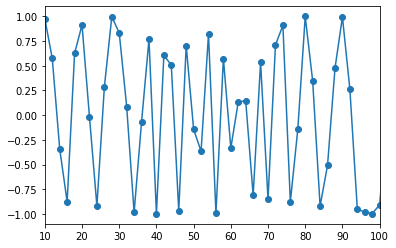

In [20]:
plt.plot(scan_time, foo[:,0])
plt.scatter(scan_time, foo[:,0])
plt.xlim([10,100])

In [21]:
retroicor

RetroicorPhysio(delta=200, peak_rise=0.95, physio_rate=400)